In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
pd.set_option('display.width',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.notebook_repr_html',True)
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('D:/Afumoons/OneDrive/Matkul/Data Mining/train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data['Survived'].value_counts().plot(kind='bar')
data['Survived'].value_counts()

In [7]:
def survival_stacked_bar(variable):
    died=data[data['Survived']==0][variable].value_counts()/len(data['Survived']==0)
    survived=data[data['Survived']==1][variable].value_counts()/len(data['Survived']==1)
    dataset=pd.DataFrame([died,survived])
    dataset.index=['Meninggal','Selamat']
    dataset.plot(kind='bar',stacked=True,title='Prosentase')
    return dataset.head()

,male,female
Meninggal,0.525253,0.090909
Selamat,0.122334,0.261504


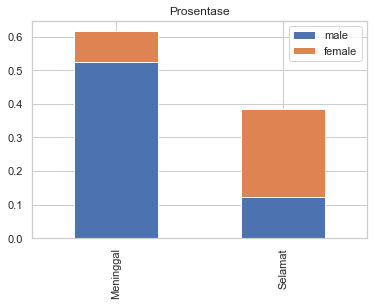

In [15]:
survival_stacked_bar('Sex')

,0,1,2,3,4,5,8
Meninggal,0.446689,0.108866,0.016835,0.013468,0.016835,0.005612,0.007856
Selamat,0.235690,0.125701,0.014590,0.004489,0.003367,NaN,NaN


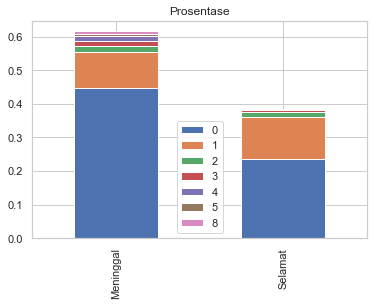

In [19]:
survival_stacked_bar('SibSp')

,1,2,3
Meninggal,0.089787,0.108866,0.417508
Selamat,0.152637,0.097643,0.133558


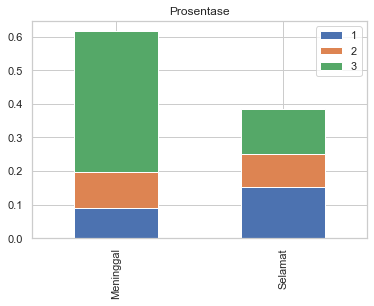

In [22]:
survival_stacked_bar('Pclass')

In [35]:
def pclass_stacked_bar(variable):
    c1=data[data['Pclass']==1][variable].value_counts()/len(data['Pclass']==1)
    c2=data[data['Pclass']==2][variable].value_counts()/len(data['Pclass']==2)
    c3=data[data['Pclass']==3][variable].value_counts()/len(data['Pclass']==3)
    dataset=pd.DataFrame([c1,c2,c3])
    dataset.index=['Class 1','Class 2','Class 3']
    dataset.plot(kind='bar',stacked=True,title='Prosentase Pengambilan Class')
    return dataset.head()

,male,female
Class 1,0.136925,0.105499
Class 2,0.121212,0.085297
Class 3,0.389450,0.161616


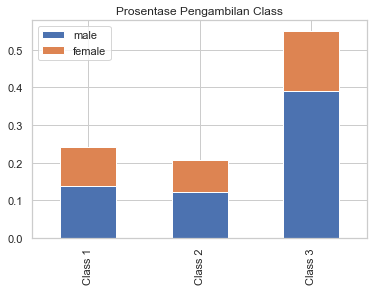

In [36]:
pclass_stacked_bar('Sex')

In [37]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64